**Nome**: *# luan César Carvalho*

**RA**: *# 11202130567*

Link para o Drive com o arquivo: https://drive.google.com/drive/folders/1Vctg4eU6rkQTPP0Sgc_GDUEtwmaL9zjq?usp=sharing

Análise de rede da dinâmica trófica nos ecossistemas do sul da Flórida

Esse projeto consiste na demonstração de uma rede da dinâmica trófica, e possui o intuito de investigar as interações entre essas áreas.

Os dados foram coletados de um banco de dados já existente, no seguinte link: https://networkrepository.com/eco-stmarks.php

Não houve necessidade do tratamento de dados, visto que a quantidade de vértices e nós eram suficientes e que não havia dados extras irrelevantes nas tabelas.

A ordem do conjunto é de 54 e o tamanho é de 353.

Cada vértice simboliza uma área ecológica dentro do sul da Flórida, suas arestas significam suas conexões ecológicas com outras áreas e o peso é a distância entre essas áreas.

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

dados = pd.read_csv('/content/eco-stmarks.edges', sep=' ')

In [ ]:
dados ##Impressão da Tabela

,52,1,28.3100000
0,52,2,41.520000
1,52,3,265.030000
2,52,4,4.520000
3,52,5,169.950000
4,52,8,0.693000
...,...,...,...
350,44,48,0.008000
351,49,6,32.250000
352,50,7,1.600000
353,50,51,6.498001


In [ ]:
dados.loc[355] = [52, 1, 28.3100000]

In [ ]:
dados.rename(columns={'52':'Origem','1':'Destino','28.3100000':'Distância'} , inplace= True) ##Mudança de título das colunas para melhor visualização do projeto

In [ ]:
G = nx.Graph()

k = 0
for nó in (dados['Origem']):
  G.add_node(dados['Origem'].loc[k])
  k += 1

j = 0
for aresta in (dados['Destino']):
  G.add_edge(dados['Origem'].loc[j], dados['Destino'].loc[j])
  j += 1

In [ ]:
print(G.order()) ##Calculo da ordem
print(G.size()) ##Calculo do tamanho

54
353


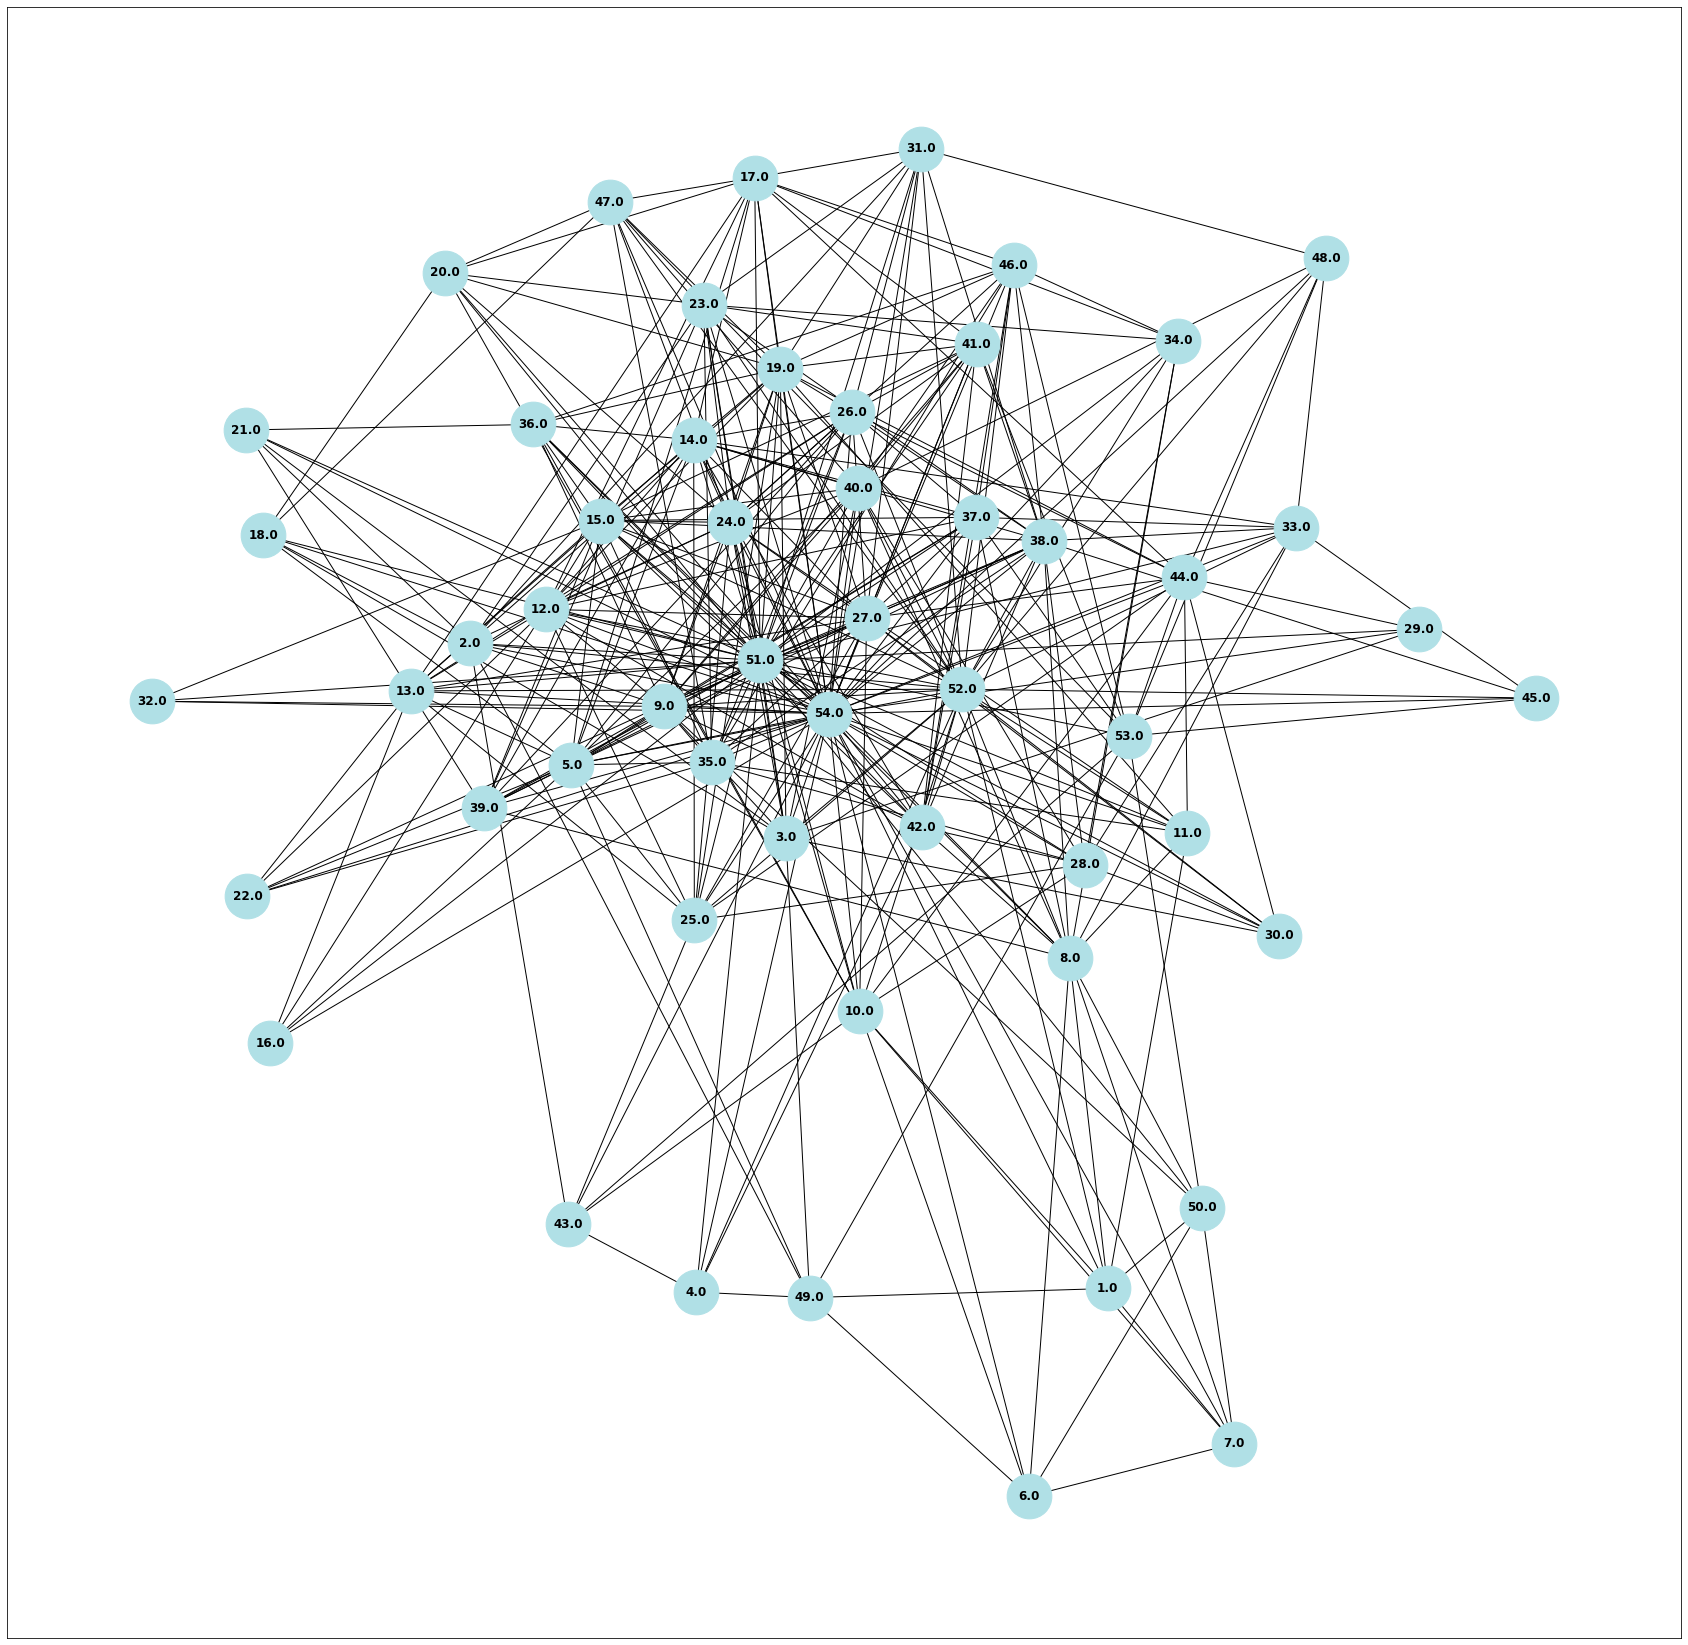

In [ ]:
plt.figure(figsize =(30, 30))
nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels=True, node_color='#B0E0E6' ,node_size=2000,font_weight='bold' )
plt.show()

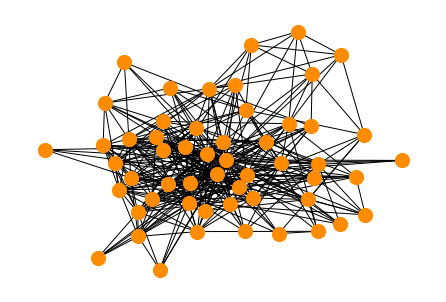

In [ ]:
nx.draw(G, with_labels=False , node_color='#FF8C00', node_size=200)


In [ ]:
nx.is_connected(G) ##Gráfo conexo ou não


True

In [ ]:
print(G.adj) ##Lista de adjacencia do grafo

{52.0: {2.0: {}, 3.0: {}, 4.0: {}, 5.0: {}, 8.0: {}, 9.0: {}, 10.0: {}, 11.0: {}, 12.0: {}, 13.0: {}, 15.0: {}, 23.0: {}, 25.0: {}, 26.0: {}, 27.0: {}, 30.0: {}, 31.0: {}, 33.0: {}, 34.0: {}, 38.0: {}, 40.0: {}, 42.0: {}, 45.0: {}, 46.0: {}, 47.0: {}, 48.0: {}, 1.0: {}}, 37.0: {53.0: {}, 54.0: {}, 5.0: {}, 8.0: {}, 9.0: {}, 12.0: {}, 14.0: {}, 15.0: {}, 26.0: {}, 27.0: {}, 33.0: {}, 42.0: {}, 46.0: {}, 51.0: {}}, 41.0: {53.0: {}, 54.0: {}, 9.0: {}, 15.0: {}, 17.0: {}, 19.0: {}, 23.0: {}, 24.0: {}, 26.0: {}, 27.0: {}, 38.0: {}, 40.0: {}, 51.0: {}, 42.0: {}}, 43.0: {53.0: {}, 54.0: {}, 2.0: {}, 4.0: {}, 10.0: {}, 25.0: {}}, 44.0: {53.0: {}, 54.0: {}, 10.0: {}, 11.0: {}, 17.0: {}, 19.0: {}, 25.0: {}, 26.0: {}, 27.0: {}, 29.0: {}, 30.0: {}, 48.0: {}}, 45.0: {52.0: {}, 53.0: {}, 54.0: {}, 33.0: {}, 38.0: {}}, 46.0: {52.0: {}, 53.0: {}, 54.0: {}, 17.0: {}, 19.0: {}, 24.0: {}, 34.0: {}, 35.0: {}, 36.0: {}, 37.0: {}, 38.0: {}, 40.0: {}, 42.0: {}}, 47.0: {52.0: {}, 53.0: {}, 54.0: {}, 17.0: {},

In [ ]:
nx.node_connectivity(G) ##Conectividade dos nós


4

In [ ]:
nx.edge_connectivity(G) ##Conectividade das arestas

4

In [ ]:
##Comando parou de funcionar desde a atualização do dia 01/12/2022
A = nx.adjacency_matrix(G)
print(A.todense())

<ipython-input-111-ac917a5b56fd>:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


AttributeError: ignored

In [ ]:
nx.diameter(G)

3

In [ ]:
##Distancia media
print(nx.average_shortest_path_length(G))

1.7610062893081762


In [ ]:
nx.is_tree(G) ##Se o grafo é uma árvore

False

In [ ]:
nx.is_forest(G) ##Se o grafo é uma floresta

False

In [ ]:
print(G.degree) ##Grau de cada vértice

[(52.0, 27), (37.0, 14), (41.0, 14), (43.0, 6), (44.0, 12), (45.0, 5), (46.0, 13), (47.0, 10), (48.0, 7), (49.0, 7), (50.0, 7), (51.0, 39), (1.0, 8), (2.0, 12), (3.0, 13), (4.0, 6), (5.0, 19), (6.0, 6), (7.0, 8), (8.0, 15), (9.0, 19), (10.0, 13), (11.0, 9), (12.0, 18), (13.0, 15), (14.0, 19), (15.0, 18), (16.0, 5), (17.0, 14), (18.0, 7), (19.0, 20), (20.0, 9), (21.0, 6), (22.0, 6), (23.0, 13), (24.0, 19), (25.0, 13), (26.0, 17), (27.0, 21), (28.0, 11), (29.0, 4), (30.0, 7), (31.0, 11), (32.0, 4), (33.0, 10), (34.0, 8), (35.0, 14), (36.0, 10), (38.0, 19), (39.0, 11), (40.0, 15), (42.0, 14), (53.0, 11), (54.0, 48)]


In [ ]:
print(max(G.degree)) ##Grau máximo

(54.0, 48)


                    


O grau médio equivale a 13

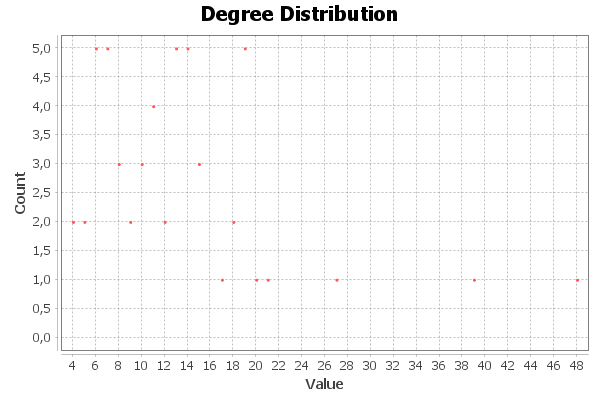

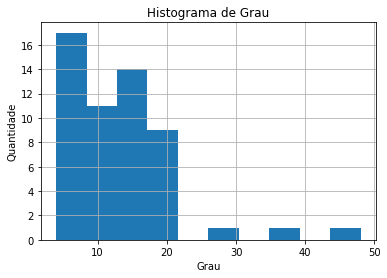

In [ ]:
##Distribuição de grau

grau = [G.degree(k) for k in G.nodes()]

plt.hist(grau)
plt.title('Histograma de Grau')
plt.ylabel("Quantidade")
plt.xlabel("Grau")
plt.grid(True)

plt.show()

In [ ]:
print(round(nx.transitivity(G), 10)) ##Transitividade

0.3329349496


In [ ]:
deg_centrality = nx.degree_centrality(G) ##Lista de Centralidades Relativas
print(deg_centrality)

{52.0: 0.5094339622641509, 37.0: 0.2641509433962264, 41.0: 0.2641509433962264, 43.0: 0.11320754716981132, 44.0: 0.22641509433962265, 45.0: 0.09433962264150943, 46.0: 0.24528301886792453, 47.0: 0.18867924528301885, 48.0: 0.1320754716981132, 49.0: 0.1320754716981132, 50.0: 0.1320754716981132, 51.0: 0.7358490566037735, 1.0: 0.1509433962264151, 2.0: 0.22641509433962265, 3.0: 0.24528301886792453, 4.0: 0.11320754716981132, 5.0: 0.3584905660377358, 6.0: 0.11320754716981132, 7.0: 0.1509433962264151, 8.0: 0.2830188679245283, 9.0: 0.3584905660377358, 10.0: 0.24528301886792453, 11.0: 0.16981132075471697, 12.0: 0.33962264150943394, 13.0: 0.2830188679245283, 14.0: 0.3584905660377358, 15.0: 0.33962264150943394, 16.0: 0.09433962264150943, 17.0: 0.2641509433962264, 18.0: 0.1320754716981132, 19.0: 0.3773584905660377, 20.0: 0.16981132075471697, 21.0: 0.11320754716981132, 22.0: 0.11320754716981132, 23.0: 0.24528301886792453, 24.0: 0.3584905660377358, 25.0: 0.24528301886792453, 26.0: 0.32075471698113206, 

In [ ]:
centrality_sorted = ((sorted(deg_centrality.items(), key=lambda item: item[1],reverse=True)))
print(centrality_sorted[0][0]) # vertice com maior centralidade de grau [relativa]
print(centrality_sorted[0][1]) # valor da maior centralidade de grau [relativa]

54.0
0.9056603773584906


In [ ]:
close_centrality = nx.closeness_centrality(G) ##Lista de Centralidade de Proximidade
print(close_centrality)

{52.0: 0.6708860759493671, 37.0: 0.5760869565217391, 41.0: 0.5760869565217391, 43.0: 0.53, 44.0: 0.5638297872340425, 45.0: 0.5247524752475248, 46.0: 0.5698924731182796, 47.0: 0.5520833333333334, 48.0: 0.5353535353535354, 49.0: 0.4953271028037383, 50.0: 0.5353535353535354, 51.0: 0.7910447761194029, 1.0: 0.5408163265306123, 2.0: 0.5638297872340425, 3.0: 0.5698924731182796, 4.0: 0.53, 5.0: 0.6091954022988506, 6.0: 0.53, 7.0: 0.53, 8.0: 0.5824175824175825, 9.0: 0.6091954022988506, 10.0: 0.5698924731182796, 11.0: 0.5463917525773195, 12.0: 0.5955056179775281, 13.0: 0.5698924731182796, 14.0: 0.5955056179775281, 15.0: 0.6022727272727273, 16.0: 0.5247524752475248, 17.0: 0.5760869565217391, 18.0: 0.5353535353535354, 19.0: 0.6162790697674418, 20.0: 0.5408163265306123, 21.0: 0.53, 22.0: 0.53, 23.0: 0.5698924731182796, 24.0: 0.6091954022988506, 25.0: 0.5698924731182796, 26.0: 0.5955056179775281, 27.0: 0.6162790697674418, 28.0: 0.5520833333333334, 29.0: 0.5196078431372549, 30.0: 0.5353535353535354, 

In [ ]:
centrality_sorted = ((sorted(close_centrality.items(), key=lambda item: item[1],reverse=True)))
print(centrality_sorted[0][0]) # vertice com maior centralidade de proximidade [relativa]
print(centrality_sorted[0][1]) # valor da maior centralidade de proximidade [relativa]

54.0
0.9137931034482759


In [ ]:
bet_centrality = nx.betweenness_centrality(G) ##Lista de Centralidade de Intermediação
print(bet_centrality)

{52.0: 0.05450745936050726, 37.0: 0.006263951752404753, 41.0: 0.005141348343879719, 43.0: 0.001923076923076923, 44.0: 0.008718843243516681, 45.0: 0.0006920926732247487, 46.0: 0.006876110638810205, 47.0: 0.004480031874806911, 48.0: 0.0023991906067377766, 49.0: 0.005159306102702328, 50.0: 0.00430812866994887, 51.0: 0.13946767230511786, 1.0: 0.004439438296477484, 2.0: 0.009928701707067625, 3.0: 0.012260122906413354, 4.0: 0.0028012543941426378, 5.0: 0.02305258294597064, 6.0: 0.0023512111175391284, 7.0: 0.0005684567005321723, 8.0: 0.016646855939308765, 9.0: 0.017289706879692363, 10.0: 0.013505344289088847, 11.0: 0.003619602712490956, 12.0: 0.008976415604200972, 13.0: 0.0033657705101827018, 14.0: 0.007766501478402785, 15.0: 0.009491793334318734, 16.0: 9.160622368169536e-05, 17.0: 0.008052225269206402, 18.0: 0.0013085758368777238, 19.0: 0.015460336725277392, 20.0: 0.0019334750466825936, 21.0: 0.000834458758987061, 22.0: 0.0002989460536630348, 23.0: 0.005845076400228793, 24.0: 0.01291418548899

In [ ]:
centrality_sorted = ((sorted(bet_centrality.items(), key=lambda item: item[1],reverse=True)))
print(centrality_sorted[0][0]) # vertice com maior centralidade de intermediacao [relativa]
print(centrality_sorted[0][1]) # valor da maior centralidade de intermediacao [relativa]

54.0
0.2671191892690441


In [ ]:
# coeficiente de clusterizacao global
print(nx.average_clustering(G))

0.4127809593795338


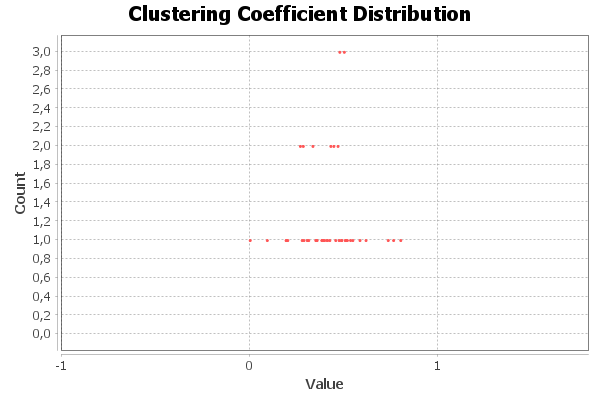

In [ ]:
print(nx.density(G)) ##Densidade

0.246680642907058


In [ ]:
G.remove_edges_from(nx.selfloop_edges(G)) ##Lista de Coreness
print(nx.core_number(G))

{52.0: 10, 37.0: 10, 41.0: 10, 43.0: 6, 44.0: 8, 45.0: 5, 46.0: 9, 47.0: 8, 48.0: 7, 49.0: 6, 50.0: 6, 51.0: 10, 1.0: 6, 2.0: 8, 3.0: 8, 4.0: 6, 5.0: 10, 6.0: 6, 7.0: 6, 8.0: 8, 9.0: 10, 10.0: 8, 11.0: 8, 12.0: 10, 13.0: 10, 14.0: 10, 15.0: 10, 16.0: 5, 17.0: 9, 18.0: 7, 19.0: 10, 20.0: 8, 21.0: 6, 22.0: 6, 23.0: 9, 24.0: 10, 25.0: 10, 26.0: 10, 27.0: 10, 28.0: 8, 29.0: 4, 30.0: 7, 31.0: 9, 32.0: 4, 33.0: 8, 34.0: 8, 35.0: 9, 36.0: 8, 38.0: 10, 39.0: 9, 40.0: 9, 42.0: 10, 53.0: 7, 54.0: 10}


In [ ]:
##Coreness do grafo
G.remove_edges_from(nx.selfloop_edges(G))
print(max(nx.core_number(G).values()))

10


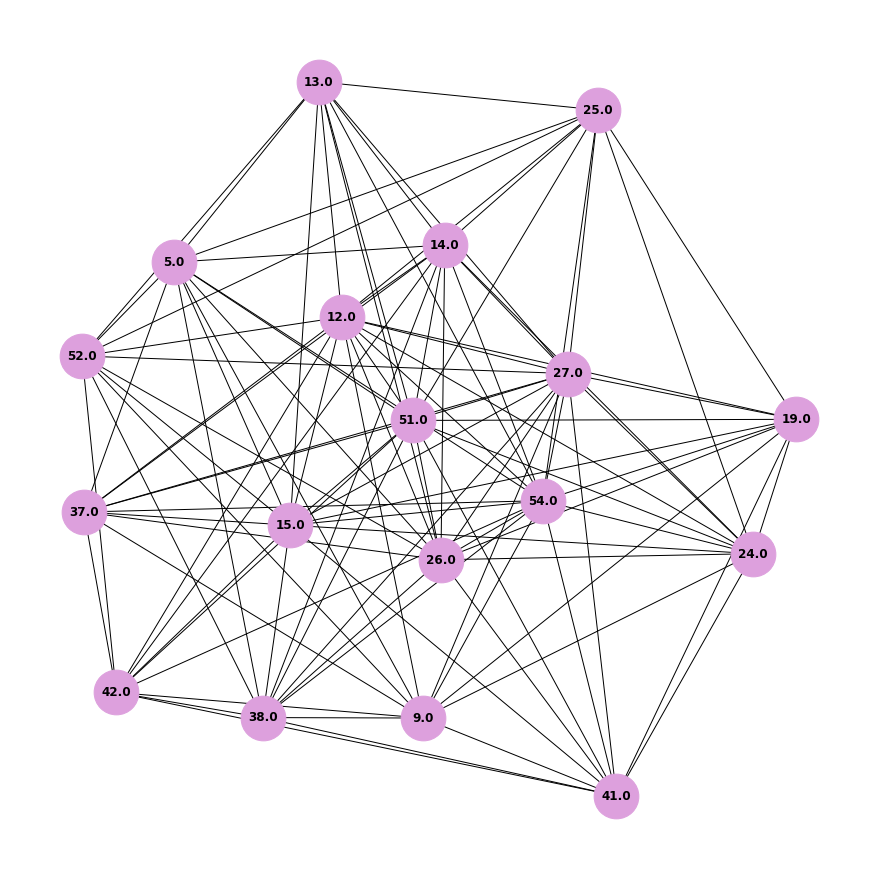

In [ ]:
##Gráfico do Maior Coroness do Grafo
plt.figure(figsize =(12, 12))
G.remove_edges_from(nx.selfloop_edges(G))
k_2 = nx.k_core(G, 10)
nx.draw_spring(k_2, with_labels=True, node_size=2000, node_color='#DDA0DD', font_weight='bold' )

In [ ]:
eccentricity = nx.eccentricity(G) ##Cálculo da excentricidade
print(eccentricity)

{52.0: 2, 37.0: 2, 41.0: 2, 43.0: 2, 44.0: 2, 45.0: 2, 46.0: 2, 47.0: 2, 48.0: 2, 49.0: 3, 50.0: 2, 51.0: 2, 1.0: 2, 2.0: 2, 3.0: 2, 4.0: 2, 5.0: 2, 6.0: 2, 7.0: 2, 8.0: 2, 9.0: 2, 10.0: 2, 11.0: 2, 12.0: 3, 13.0: 2, 14.0: 2, 15.0: 2, 16.0: 2, 17.0: 2, 18.0: 2, 19.0: 2, 20.0: 3, 21.0: 2, 22.0: 2, 23.0: 2, 24.0: 2, 25.0: 2, 26.0: 2, 27.0: 3, 28.0: 3, 29.0: 2, 30.0: 2, 31.0: 2, 32.0: 3, 33.0: 3, 34.0: 3, 35.0: 2, 36.0: 3, 38.0: 2, 39.0: 2, 40.0: 2, 42.0: 2, 53.0: 2, 54.0: 2}


In [ ]:
radius = nx.radius(G) ##Excentricidade mínima
print(radius)

2


In [ ]:
periphery = nx.periphery(G) ##Lista de nós com excentricidade igual ao diametro
print(periphery)

[49.0, 12.0, 20.0, 27.0, 28.0, 32.0, 33.0, 34.0, 36.0]


**ANÁLISE DO GRAFO**

---


O grafo simples, não-direcionado, não-ponderado e
conexo. Possui 54 vértices e 353 arestas.
Possui 3 laços nos vértices 7, 13 e 14, idicando que
a cadeia alimentar daquela região também pode interagir
com ela mesma.
O maior caminho entre os menores, ou seja,
seu diâmetro, é 3. O que demonstra que todas as
áreas são de fácil acesso por outras.
Tanto a conectividade de nós, como as de arestas
valem 4. Necessitando assim retirar 4 vértices
ou 4 arestas para desconectar os ecossistemas (destruir 4 cadeias alimentares ou suas interações para acabar com todas interações)
O gráfo é conexo, porém é cíclico, o que não
o caracteriza como uma árvore. Como não é uma
árvore, também não é uma floresta.
O vértice de maior centralidade de grau é o 54,
que é definido como o mais importante nó do
grafo, ditando assim o fluxo dinamico entre
as regiões para a dinâmica das cadeias
alimentares e os seres vivos dessas regiões (possui
conexão com outros 48 nós/áreas)
Este nó possui a maior centralidade de
proximidade, indicando que é o mais central
do grafo e também a maior centralidade
de intermediação, sendo considerado o nó
principal para interligar outras dois regiões
do ecossistema.
Com taxa de clusterização global de aproximadamente
41%, o grafo demonstra que os nós tendem a não se
agrupar, ou seja, há poucos círculos de interações
entre os animais de diferentes regiões.
O grafo possui uma relação de arestas de apenas
25%, caracterizando assim a densidade.
O coreness do grafo equivale a 10, ou seja, é o maior
coreness dos nós possível para formar um grafo, já que
a partir do coreness 11 não há mais grafo. Regiões da
flórida podem ser retiradas do ecossistemas sem afetarem
por completo por 10 vezes.
No grafo, há 9 vértices com excentricidade igual ao
diametro, que é o quão longe da para chegar a partir
desse vértice, podendo assim cruzar o grafo todo, e
analogamente todos as regiões e cadeias tróficas.